In [1]:
seedNum = 888
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import random
import statsmodels.api as sm
tf.random.set_seed(seedNum)
np.random.seed(seedNum)
import matplotlib.pyplot as plt
from tensorflow import keras
from datetime import datetime
import time
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, f1_score
import sys, os
print(os.getcwd())
# os.chdir('/media/lqs/李秋水的移动硬盘1/DeepCI')
os.chdir('c:/Users/lqs/Downloads/DeepCI')
import warnings
warnings.simplefilter('ignore')
import itertools
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, utils, models
from sklearn.model_selection import train_test_split


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import numpy
numpy.set_printoptions(threshold=sys.maxsize)
torch.set_printoptions(threshold=sys.maxsize)

import argparse
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
# ! pip install statsmodels

c:\Users\lqs\Downloads\DeepCI


In [2]:

#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255# shape (60000, 28, 28)
X_test  = X_test/255# shape (10000, 28, 28)
(example_X_train,example_y_train) = (X_train[:2000], y_train[:2000])
(example_X_test,example_y_test) = (X_test[:2000], y_test[:2000])


In [3]:
a = y_train
b = X_train

In [4]:
func_run = "none"
n_epochs = 200
bs = 200
args={}
kwargs={}
args['batch_size']=100
args['test_batch_size']=200
args['epochs']=50  #The number of Epochs is the number of times you go through the full dataset. 
args['lr']=0.0002 #Learning rate is how fast it will decend. 
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=600
args['cuda']= True #

In [5]:
def get_function(func_str):
    if func_str == "abs":
        return (lambda x: (-1+0.4*np.abs(x)).flatten(), 
                lambda x: (-1+0.4*torch.abs(x)).flatten())
    elif func_str == "log":
        return (lambda x: 2*np.log(np.abs(x)).flatten(), 
                lambda x: 2*torch.log(torch.abs(x)).flatten())
    elif func_str == "sin":
        return (lambda x: (0.5+0.5*np.sin(x)).flatten(), 
                lambda x: (0.5+0.5*torch.sin(x)).flatten())
    elif func_str == "none":
        return (lambda x: 0.2*x.flatten(), 
                lambda x: 0.2*torch.Tensor(x).flatten())
    else:
        return (lambda x: np.sign(np.abs(np.abs(x)-5)-2).flatten(), 
                lambda x: torch.sign(torch.abs(torch.abs(x)-5)-2).flatten())

In [6]:
def Simdata(NUM_I,seed,func,rho): #a = y_train/test, b = X_train/test
    
    np.random.seed(seed)    
    X_1_a_j = [] 
    X_2_a_j = [] 
    X_1_a_k = [] 
    X_2_a_k = [] 
    X_1_b_j = [] 
    X_2_b_j = [] 
    X_1_b_k = [] 
    X_2_b_k = []
    Z       = []
    

    X_2_a_j_t = [] 
    X_2_a_k_t = [] 
    X_2_b_j_t = [] 
    X_2_b_k_t = []

    for i in tqdm(range(0,NUM_I)):
        J = np.random.randint(4,10) # number of choice
              
        
        samplea = np.array(random.sample(list(np.arange(a.shape[0])),J)) # a list of index
        samplea = np.expand_dims(samplea, axis=1)
        ej = np.concatenate([a[i] for i in samplea],axis = None) # a list of number on images
        ej = [i for i in ej.tolist()]
        ej = np.float_(ej)

        X_1_a = np.random.uniform(-1,1,J) #customer a
        X_2_a = ej
        X_2_a_pic = [torch.Tensor(b[i]) for i in samplea]
        
        
        
        
        sampleb = np.array(random.sample(list(np.arange(a.shape[0])),J)) # a list of index
        sampleb = np.expand_dims(sampleb, axis=1)
        ej = np.concatenate([a[i] for i in sampleb],axis = None) # a list of number on images
        ej = [i for i in ej.tolist()]
        ej = np.float_(ej)
        
        X_1_b = np.random.uniform(-1,1,J) #customer b
        X_2_b = ej
        X_2_b_pic = [torch.Tensor(b[i]) for i in sampleb]
        
        
        
        xi  = np.random.normal(0,0.5,J)    # same across all customers
        
        # X_2_a = X_2_a + rho*xi  #customer a endogeneity remove for now
        # X_2_b = X_2_b + rho*xi  #customer b endogeneity remove for now
        
        u_a   = X_1_a + 2*func(X_2_a) + xi + np.random.normal(0,3,J) # \epsilon_{a} # 3 for score
        u_b   = X_1_b + 2*func(X_2_b) + xi + np.random.normal(0,3,J) # \epsilon_{b}
        
        choice_j = np.argmax(u_a) # return the index of product in the sample that customer a chose, we assume customer a as choose j
        choice_k = np.argmax(u_b) # return the index of product in the sample that customer b chose, we assume customer b as choose k
               
        if choice_j == choice_k:
            continue
        else:  

            X_1_a_j.append(X_1_a[choice_j])
            X_2_a_j.append(X_2_a_pic[choice_j])
            X_1_a_k.append(X_1_a[choice_k])
            X_2_a_k.append(X_2_a_pic[choice_k])
            
            X_1_b_j.append(X_1_b[choice_j]) 
            X_2_b_j.append(X_2_b_pic[choice_j]) 
            X_1_b_k.append(X_1_b[choice_k]) 
            X_2_b_k.append(X_2_b_pic[choice_k])
            
            
            
            X_2_a_j_t.append(X_2_a[choice_j])
            X_2_a_k_t.append(X_2_a[choice_k])             
            X_2_b_j_t.append(X_2_b[choice_j]) 
            X_2_b_k_t.append(X_2_b[choice_k])
            #Z.append(np.array([X_1_a[choice_j], X_2_a[choice_j], X_1_a[choice_k], X_2_a[choice_k],X_1_b[choice_j], X_2_b[choice_j], X_1_b[choice_k], X_2_b[choice_k]]))
            Z.append(np.array([X_1_a[choice_j],X_1_a[choice_k],X_1_b[choice_j],X_1_b[choice_k]]))
            
    X_2_a_j = torch.cat(X_2_a_j, out=torch.Tensor(len(X_2_a_j), 28, 28))
    X_2_a_k = torch.cat(X_2_a_k, out=torch.Tensor(len(X_2_a_k), 28, 28))
    X_2_b_j = torch.cat(X_2_b_j, out=torch.Tensor(len(X_2_b_j), 28, 28))
    X_2_b_k = torch.cat(X_2_b_k, out=torch.Tensor(len(X_2_b_k), 28, 28))
    
            
    print("simdata:X_2_a_k:",X_2_a_k.shape)
    return torch.Tensor(X_1_a_j).reshape((-1,1)).double(), X_2_a_j.unsqueeze(1), \
    torch.Tensor(X_1_a_k).reshape((-1,1)).double(), X_2_a_k.unsqueeze(1), torch.Tensor(X_1_b_j).reshape((-1,1)).double(), \
    X_2_b_j.unsqueeze(1), torch.Tensor(X_1_b_k).reshape((-1,1)).double(), X_2_b_k.unsqueeze(1), \
    torch.tensor(Z, dtype=torch.float64),\
    torch.Tensor(X_2_a_j_t).reshape((-1,1)).double(), torch.Tensor(X_2_a_k_t).reshape((-1,1)).double(),\
    torch.Tensor(X_2_b_j_t).reshape((-1,1)).double(), torch.Tensor(X_2_b_k_t).reshape((-1,1)).double()

In [7]:
aa,bb = get_function(func_run)

In [8]:
X_1_a_j, X_2_a_j, X_1_a_k, X_2_a_k, X_1_b_j, X_2_b_j, X_1_b_k, X_2_b_k, Z,  X_2_a_j_t, X_2_a_k_t,  X_2_b_j_t,  X_2_b_k_t= Simdata(5000,2,aa,0.2)

100%|██████████| 5000/5000 [00:15<00:00, 316.77it/s]

simdata:X_2_a_k: torch.Size([4089, 28, 28])


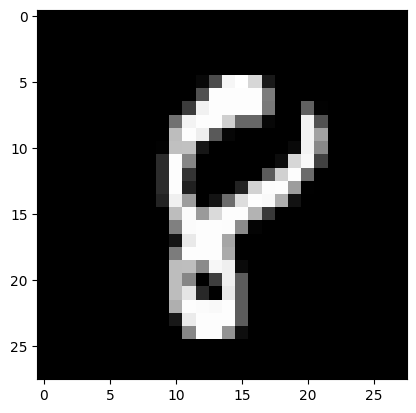

torch.Size([4089, 1, 28, 28])


In [9]:
image = X_2_a_k[6]
# plot the sample
fig = plt.figure
plt.imshow(image.squeeze(0), cmap='gray')
plt.show()
print(X_2_a_k.shape)

In [10]:
import sys
import os
sys.path
print(sys.path)
sys.path.append('/notebooks/AdversarialGMM/')

['c:\\Users\\lqs\\Downloads\\DeepCI', 'c:\\Python311\\python311.zip', 'c:\\Python311\\Lib', 'c:\\Python311\\DLLs', '', 'C:\\Users\\lqs\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\lqs\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32', 'C:\\Users\\lqs\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib', 'C:\\Users\\lqs\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin', 'c:\\Python311', 'c:\\Python311\\Lib\\site-packages']


In [11]:
device = torch.cuda.current_device() if torch.cuda.is_available() else None
print(torch.cuda.is_available())
print(device)

True
0


In [12]:
k = 256
n_hidden = 300
n_instruments = 1
dropout_p = 0.1

net_learner_supervised = torch.nn.Sequential(
            torch.nn.Linear(784, k),
            torch.nn.BatchNorm1d(k),
            torch.nn.LeakyReLU(0.2),
            torch.nn.Dropout(p=dropout_p),
            torch.nn.Linear(k, 256),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(256, 10),
            torch.nn.Softmax(dim=1)
            )# input shape (batch, 784), output shape (batch, 1)

net_adversary = torch.nn.Sequential(
            torch.nn.Linear(784, k),# 48 is the number of features
            torch.nn.LeakyReLU(0.2),
            nn.Dropout(p=0.1),                        
            torch.nn.Linear(k, 256), #200
            torch.nn.LeakyReLU(),
            nn.Dropout(p=0.1),                        
            torch.nn.Linear(256, 784),
            torch.nn.Tanh()
            )# input shape (batch, 1, 28, 28), output shape (batch, 1, 28, 28)
 

In [13]:
import torch.utils.data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       #transforms.Normalize((0.1307,), (0.3081,))
                       
                   ])),
    batch_size=args['batch_size'], shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       #transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['test_batch_size'], shuffle=True, **kwargs)

import torchvision.transforms as T
transform = T.Resize((32,32))

In [14]:
class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.gen = nn.Sequential(
            nn.Linear(100, 256),  # 用线性变换将输入映射到256维
            nn.ReLU(True),  # relu激活
            nn.Linear(256, 256),  # 线性变换
            nn.ReLU(True),  # relu激活
            nn.Linear(256, 784),  # 线性变换
            nn.Tanh()  # Tanh激活使得生成数据分布在【-1,1】之间，因为输入的真实数据的经过transforms之后也是这个分布
        )
 
    def forward(self, x):
        x = self.gen(x)
        return x

In [15]:
class Net_X(nn.Module):
    def __init__(self):
        super(Net_X, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return x.squeeze()

Net_X

__main__.Net_X

In [16]:
d = torch.Tensor(X_train[:100]).unsqueeze(1)

In [17]:
learner = net_learner_supervised

adversary = generator()

In [18]:
def train(epoch):
    for batch_idx, (data, target) in enumerate(train_loader):
        if args['cuda']:
            data, target = data.to(device), target.to(device)
        #Variables in Pytorch are differenciable. 
        #data = transform(data)
        #data = torch.concat([data,data,data],axis=1)
        #
        data = data.float()
        data, target = Variable(data), Variable(target)
        #This will zero out the gradients for this batch. 
        optimizer.zero_grad()
        data = data.view(-1, 784)
        output = model(data)
        # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
        loss = F.nll_loss(output, target)
        #dloss/dx for every Variable 
        loss.backward()
        #to do a one-step update on our parameter.
        optimizer.step()
        #Print out the loss periodically. 
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss))

def test(model):
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if args['cuda']:
            data, target = data.to(device), target.to(device)
        data, target = Variable(data, volatile=True), Variable(target)
        data = torch.flatten(data, start_dim=1)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).data.item()
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
    test_loss /= len(test_loader)
    print("test_loss: ", test_loss)
    print("Accuracy: ", 100. * correct / len(test_loader.dataset))

In [19]:
model = Net_X().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.0001)

# for epoch in range(1, 50):
#     train(epoch)
#     test()

In [20]:
from model.adeepci import ADeepCI
CUDA_LAUNCH_BLOCKING=1
res = ADeepCI(learner, adversary).fit(X_1_a_j, X_2_a_j, X_1_a_k, X_2_a_k, 
                  X_1_b_j, X_2_b_j, X_1_b_k, X_2_b_k, Z, X_2_a_j_t,X_2_a_k_t,X_2_b_j_t,X_2_b_k_t,
                  learner_l2=1e-4, adversary_l2=1e-4, adversary_norm_reg=1e-4,
                  learner_lr=0.00001, adversary_lr=0.00002, n_epochs=50, bs=bs, train_learner_every=1, train_adversary_every=1,
                  ols_weight=0.1, warm_start=True, logger=None, model_dir='.', device = device, verbose=False)

Initializing ADeepCI
BaseSupLossADeepCI: Training learner and adversary
shape of x_2_a_j_batch torch.Size([200, 1, 28, 28])
Type of pred_a_k <class 'torch.Tensor'>
Type of X_2_a_k_t <class 'torch.Tensor'>
shape(pred_a_k) torch.Size([200, 1])
shape(X_2_a_k_t) torch.Size([200, 1])


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
model_temp = learner #torch.load(os.path.join(res.model_dir,"epoch{}".format(res.n_epochs - 1)))
import matplotlib.pyplot as plt
import numpy as np

X_2_a_k = torch.flatten(X_2_a_k, start_dim=1)
print("shape of X_2_a_k: ", X_2_a_k.shape)
test(model_temp)

In [ ]:
plt.scatter(X_2_a_k_t.T.squeeze().cuda().data.numpy(), aa(X_2_a_k_t).cuda().data.numpy())# plot the true function
plt.show()

In [ ]:
import numpy as np

import statsmodels.api as sm

y = learner(X_2_a_k).cpu().data.numpy()
x = aa(X_2_a_k_t).cpu().data.numpy()

print(np.mean((y - x) ** 2))

In [ ]:
x = sm.add_constant(x, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(y,x)

res = mod.fit()

print(res.summary())